# 𝐋𝐚𝐛𝐨𝐫𝐚𝐭𝐨𝐫𝐢𝐨 2 𝐄𝐬𝐭𝐚𝐝í𝐬𝐭𝐢𝐜𝐚 𝐂𝐨𝐦𝐩𝐮𝐭𝐚𝐜𝐢𝐨𝐧𝐚𝐥


 
𝐄𝐬𝐭𝐮𝐝𝐢𝐚𝐧𝐭𝐞𝐬:

Fernanda Araya Zárate - 202173026−5

Javier Miranda Lanyon - 202104073−0

Rodrigo Pizarro Alegría - 201910012−2

En primer lugar, importaremos todas las librerías que vamos a utilizar para desarrollar la experiencia

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Lanzamiento de dados

a) Para calcular la probabilidad teórica notamos que el espacio muestral es de $36$ casos, y solo nos sirve $1$ (donde se obtienen dos números seis). Por lo tanto, la probabilidad es de $\frac{1}{36}$

Para realizar lo siguiente, creamos una función que genera lanzamiento de 2 dados de manera aleatoria:

In [2]:
def twodicetoss():
    primero=random.randint(1,6)
    segundo=random.randint(1,6)
    return ((primero,segundo))

A continuación, creamos una función para generar las simulaciones usando nuestra funcion de lanzamiento de dados:

In [3]:
def probabilitydicetoss(n):
    check=(6,6)
    matches=0
    for i in range(0,n):
        if twodicetoss() == check:
            matches+=1
    return matches/n 

Con el siguiente programa, guardaremos las probabilidades en una lista, obteniendo 8 resultados para cada caso:

In [4]:
probabilities=[]
for i in range(0,8):
    indice=10**(i+1)
    probabilities.append(probabilitydicetoss(indice))
print(probabilities)

[0.0, 0.02, 0.022, 0.0288, 0.02812, 0.027925, 0.0277904, 0.0277651]


A continuación, calculamos el error absoluto entre la probabilidad teórica y la experimental:

In [5]:
error=[]
for i in range(0,8):
    error.append(abs(1/36-probabilities[i]))
print(error)

[0.027777777777777776, 0.007777777777777776, 0.0057777777777777775, 0.001022222222222223, 0.0003422222222222229, 0.0001472222222222222, 1.2622222222223589e-05, 1.2677777777775345e-05]


Finalmente, graficamos lo pedido (primer gráfico):

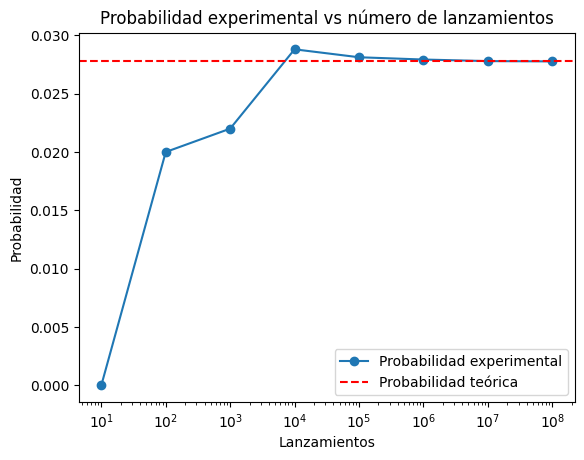

In [7]:
lanzamientos =[]
for i in range(0,8):
    lanzamientos.append(10**(i+1))
plt.figure()
plt.xscale('log')
plt.plot(lanzamientos, probabilities,marker='o', linestyle='-', label="Probabilidad experimental")
plt.axhline(y=1/36, color='r', linestyle='--', label="Probabilidad teórica")
plt.xlabel('Lanzamientos')
plt.ylabel('Probabilidad')
plt.title('Probabilidad experimental vs número de lanzamientos')
plt.legend()


plt.show()

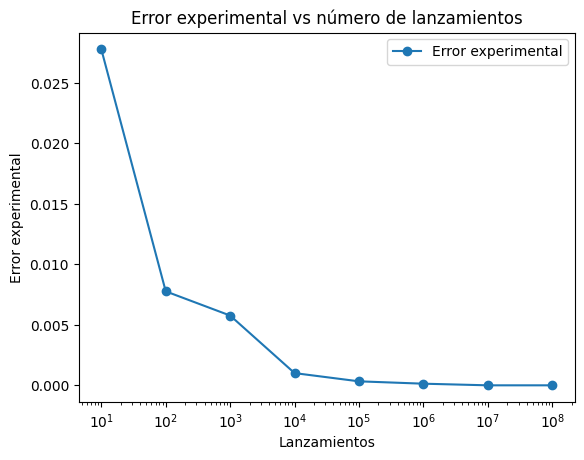

In [10]:
plt.figure()
plt.xscale('log')
plt.plot(lanzamientos, error,marker='o', linestyle='-', label="Error experimental")
plt.xlabel('Lanzamientos')
plt.ylabel('Error experimental')
plt.title('Error experimental vs número de lanzamientos')
plt.legend()


plt.show()

$\textbf{Observación importante: }$ Según investigamos en la literatura, cuando se tienen potencias en los ejes coordenados de un gráfico (como es el caso de esta simulación) es conveniente tratar aquel eje (o incluso todo el gráfico) con una escala logarítmica. Esto fue realizado en el caso de nuestros gráficos.

b) Generalizamos la función de dados para lanzar $n$ dados (en el primer caso usaremos $n=15$ y en el segundo $n=5$)

In [11]:
def ndicetoss(n):
    return tuple(random.choices(range(1, 7), k=n))

A continuación crearemos un programa para realizar las simulaciones, pero antes unas consideraciones: En primer lugar, calculamos a mano los números primos entre 15 y 90 (porque así tenemos los números posibles del espacio muestral del experimento). Para ello usaremos la siguiente función:

In [35]:
def prime(x, y):
    prime_list = []
    for i in range(x, y):
        if i == 0 or i == 1:
            continue
        else:
            for j in range(2, int(i/2)+1):
                if i % j == 0:
                    break
            else:
                prime_list.append(i)
    return prime_list
primos_15_90=prime(15,90)

En segundo lugar, modificamos la siguiente función y siguiente programa para adaptarlos al experimento actual:

In [36]:
def probabilitydicetoss15(m):
    primos=primos_15_90
    matches=0
    for i in range(0,m):
        if sum(ndicetoss(15)) in primos:
            matches+=1
    return matches/m

In [37]:
probabilities15=[]
for i in range(1,5):
    indice=10**(i+1)
    probabilities15.append(probabilitydicetoss15(indice))
print(probabilities15)

[0.15, 0.222, 0.2145, 0.21378]


En conclusión, podemos estimar que la probabilidad es de aproximadamente $0.21378$

Ahora procederemos con la simulación de los pares y las escalas. En primer lugar, haremos nuestros supuestos:

1) Una escala es solo en orden ascendente, es decir (1,2,3,4,5) o (2,3,4,5,6) es la única opción.
2) El orden en el que salen los números no importa. Es decir, (2,2,2,5,6) es un trío y (2,3,2,1,2) tambien es un trío.
3) En orden de relevancia es: escala, trio y par y finalmente dos pares. Es decir, si sale (2,2,2,3,2), consideraremos que existe un trío (por el 2,2,2), no que son dos pares (2,2 y 2,2), por más que claramente se pueda interpretar como dos pares. Análogamente, si sale un (2,2,3,5,2), no consideraremos como par (2,2) sino que se considerará que existe un trío (2,2,2).
4) Notamos que los eventos a considerar (dos pares, un par y un trío o una escala) son eventos disjuntos, por ende la probabilidad que ocurra alguno de estos eventos equivale a la suma de las probabilidades por separado, lo que nos facilitará los calculos (no pueden salir dos pares y un par al mismo tiempo, ya que lo separamos bajo nuestras consideraciones, etc).

A continuación las funciones que generamos para contar los casos favorables:

In [17]:
def check_escalas(toss):
    return toss == (1,2,3,4,5) or toss == (2,3,4,5,6)

def check_trio_y_par(toss):
    counts = Counter(toss)
    if (5 in counts.values()):
        return 5 in counts.values()
    else:  
        return 3 in counts.values() and 2 in counts.values()

def check_dos_pares(toss):
    counts = Counter(toss)
    if (4 in counts.values()):
        return 4 in counts.values()
    else:
        return list(counts.values()).count(2) == 2

Creamos la función para calcular la probabilidad:

In [18]:
def probabilitydicetoss5(m):
    matches=0
    for i in range(0,m):
        toss = ndicetoss(5)
        if check_escalas(toss):
            matches+=1
        elif check_trio_y_par(toss):
            matches+=1
        elif check_dos_pares(toss):
            matches+=1
    return matches/m

Ahora creamos el siguiente programa para simular según los valores dados:

In [33]:
probabilities5=[]
proba_escala=[]
proba_triopar=[]
proba_dospar=[]
for i in range(1,5):
    indice=10**(i+1)
    probabilities5.append(probabilitydicetoss5(indice))
print(probabilities5)

[0.26, 0.273, 0.2924, 0.2935]


Concluímos que el valor aproximado de la probabilidad que buscamos calcular es de $0.293$

$\textbf{Observación importante:}$ Recordar que esta probabilidad experimental es exclusiva bajo nuestras consideraciones hechas al comienzo, que son válidas en base a lo que preguntamos por el canal de dudas-lec, claramente cambiar estas consideraciones alterará la probabilidad.

$\textbf{Conclusiones}:$ En primer lugar, de la parte a) podemos notar que se cumple la ley de los grandes números, puesto que, nuestra probabilidad experimental se acerca a la teórica (que es una constante). Además, el error experimental cada vez se hace más pequeño según aumentamos el número de simulaciones del experimento que realizamos. En segundo lugar, del ítem b), notamos que no calculamos la probabilidad teórica ya que es mucho más complejo de obtener respecto al experimento de la parte a), no obstante también podemos notar un comportamiento que tiende a una constante a medida que aumentamos el número de simulaciones, lo que nos permite concluir que también se estaría cumpliendo la ley en cuestión.

# Método de Montecarlo


Definimos la función a integrar. 

In [2]:
def funcion(x, y):
    return np.exp(x) * np.cos(y)**2 / (1 + x**2)

Claramente lo que se está calculando con esta integral doble es el volumen generado bajo la gráfica de esta función y el plano $XY$. Leyendo la bibliografía otorgada para el método éxito-fracaso, notamos que en base a la demostración, nuestra integral se podrá aproximar mediante calcular el volumen (paralelepipedo) del espacio $3D$ donde vive la gráfica de toda la función y multiplicarlo por el cuociente entre valores "exitosos" (que serán los puntos que están dentro del volumen que queremos calcular, es decir, bajo la función) y la totalidad de puntos generados. Debido a lo anterior, creamos una función generadora de puntos uniformes utilizando la librería random. Estos puntos se generaran en el plano $XY$ en el rectángulo $[-2,2] \times [-2,2]$, y para generar los puntos en el eje $Z$ lo que haremos será notar que la función siempre es positiva, por ende $z \geq 0$, y por otro lado, el valor máximo que puede alcanzar será cuando el coseno sea máximo (es decir, cuando $y=0$ en el intervalo que estamos trabajando) y el resto de la función de una variable con la exponencial y el polinomio es creciente, por ende el valor máximo se alcanzará para $x=2$. Reemplazando notamos que este valor es a lo más 2 (es decir $z \leq 2$). Con esto en mente, los valores de $z$ se generarán entre $0$ y $2$.

In [3]:
def generate_random_points(num_points, x_min, x_max, y_min, y_max, z_min ,z_max):
    x = np.random.uniform(x_min, x_max, num_points)
    y = np.random.uniform(y_min, y_max, num_points)
    z = np.random.uniform(z_min, z_max, num_points)
    return x, y, z

A continuación, generamos un programa que calculará los éxitos en base al criterio que mencionamos anteriormente, y luego calculará el valor de la integral. Es evidente que el volumen de la región de paralelepipedo es $4 \cdot 4 \cdot 2$. Esto lo realizaremos para las cuatro cantidades de puntos pedidas:

In [5]:
indices=[10**4,10**5,10**7,10**8]
valor_int=[]
for j in indices:
    x, y, z = generate_random_points(j, -2, 2, -2, 2, 0, 2)
    hits = np.sum(z <= funcion(x, y))
    int_value = 4 * 4 * 2 * hits / j
    valor_int.append(int_value)

print(valor_int)

[5.2448, 5.32928, 5.2905728, 5.29988768]


Con estos resultados, podemos concluir que el resultado de la integral debe ser aproximadamente $5.29988768$, lo que nos indica que la precisión aumenta bastante por cada simulación. Este comportamiento es el esperado ya que cada vez utilizamos 10 veces más puntos. A modo de contrastar (para verificar con el valor "real" de esta integral), generamos un programa que nos calculará mediante las técnicas no probabilísticas el valor de esta integral y luego lo podremos comparar con el resultado que obtuvimos. Para ello utilizaremos scipy:

In [6]:
from scipy.integrate import dblquad

x_lower = -2
x_upper = 2
y_lower = -2
y_upper = 2

result, error = dblquad(funcion, x_lower, x_upper, lambda x: y_lower, lambda x: y_upper)

print(f"El valor de la integral doble es: {result}, con un error de : {error}")

diferencia=abs(valor_int[3]-result)
print("La diferencia entre método montecarlo e integración real numérica es", diferencia)

El valor de la integral doble es: 5.30022660692092, con un error de : 4.269725792545309e-10
La diferencia entre método montecarlo e integración real numérica es 0.0003389269209197465


Concluímos así que nuestro método es excelente para aproximar el valor de esta integral doble, ya que hay una diferencia de apenas $0.00033$ aproximadamente

b) El programa siguiente realizará la simulación solo para dos casos, $10^4$ y $10^5$ con motivos de visualización más sencilla. Realizamos 4 gráficos por cada caso para visualizar de distintos ángulos los puntos.

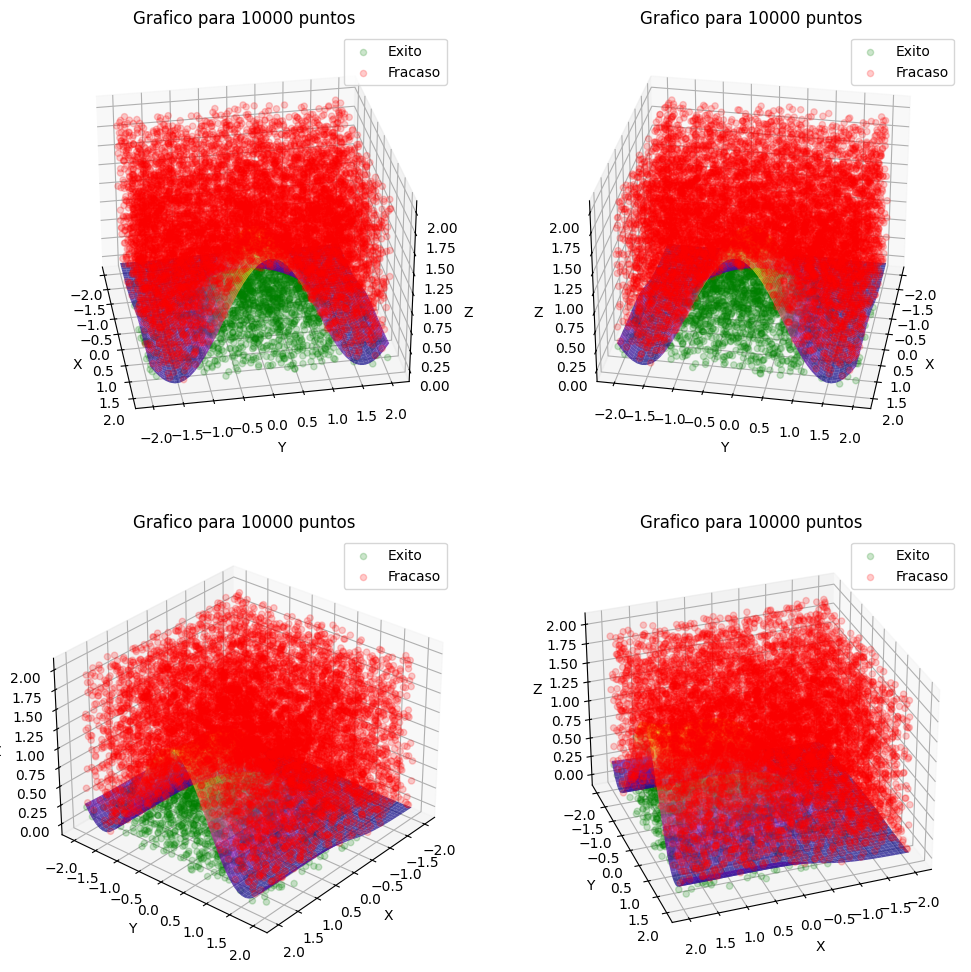

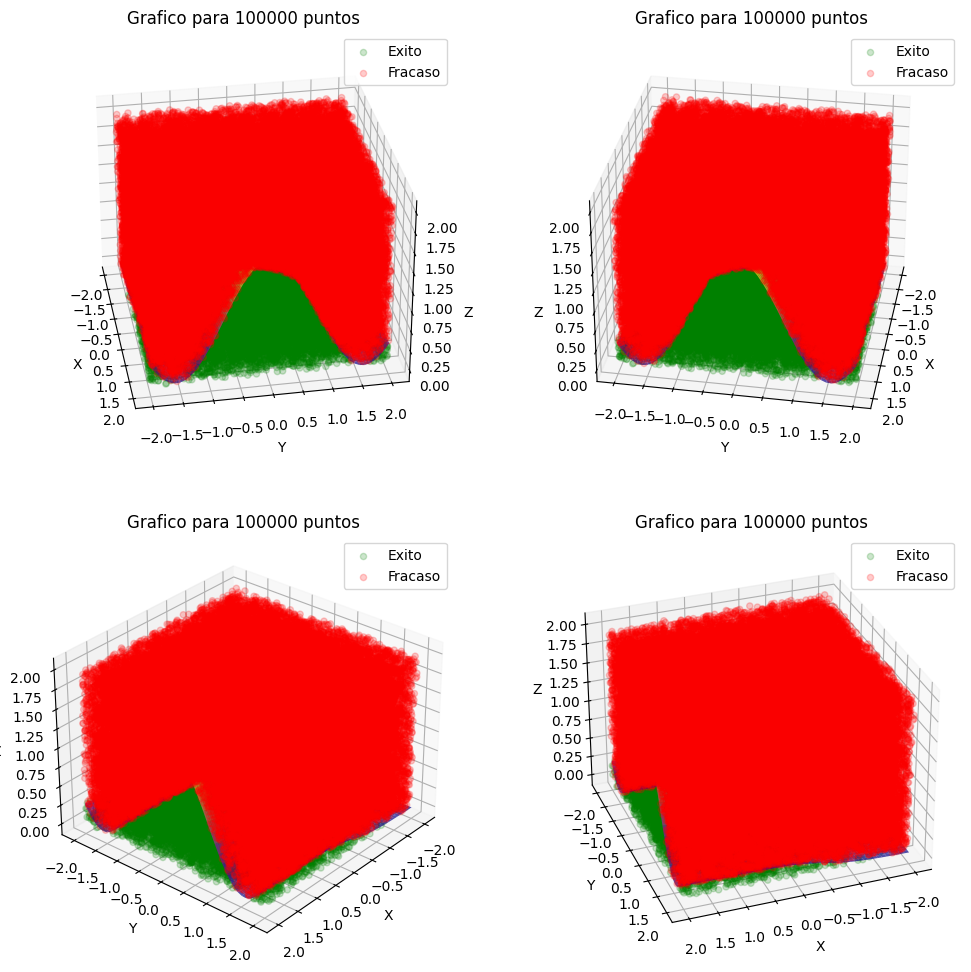

In [7]:
def plot_view(elev, azim, index, x, y, z, mask, x_vals, y_vals, z_vals,num):
    ax = fig.add_subplot(2, 2, index, projection='3d')
    ax.scatter(x[mask], y[mask], z[mask], c='g', marker='o', alpha=0.2, label='Exito')
    ax.scatter(x[~mask], y[~mask], z[~mask], c='r', marker='o', alpha=0.2, label='Fracaso')
    ax.plot_surface(x_vals, y_vals, z_vals, cmap='plasma', alpha=0.7)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f'Grafico para {num} puntos')
    ax.legend()

indices = [10**4,10**5] 
valor_int = []

for j in indices:
    x, y, z = generate_random_points(j, -2, 2, -2, 2, 0, 2)
    mask = z <= funcion(x, y)
    
    fig = plt.figure(figsize=(12, 12))

    x_vals = np.linspace(-2, 2, 50)
    y_vals = np.linspace(-2, 2, 50)
    x_vals, y_vals = np.meshgrid(x_vals, y_vals)
    z_vals = funcion(x_vals, y_vals)

    plot_view(30, -10, 1, x, y, z, mask, x_vals, y_vals, z_vals,j)
    plot_view(30, 10, 2, x, y, z, mask, x_vals, y_vals, z_vals,j)
    plot_view(30, 40, 3, x, y, z, mask, x_vals, y_vals, z_vals,j)
    plot_view(30, 70, 4, x, y, z, mask, x_vals, y_vals, z_vals,j)

    plt.show()

Al aumentar la cantidad de puntos 10 veces, podemos apreciar que la aproximación será mucho mejor debido a la concentración de puntos que se puede observar de una a otra simulación.

# Simulación de un proceso aleatorio

Denotaremos a las caras por $0$ y a los sellos por $1$. Luego podemos usar la misma función que para el experimento de los dados con una pequeña modificación:

In [8]:
def ncoinflip(n):
    return tuple(random.choices(range(0, 2), k=n))

a) A continuación, creamos una función que detecta si hay tres ceros (caras) seguidos:

In [12]:
def check3carasseguidas(coinflip):
    count=0
    for numero in coinflip:
        if numero == 0:
            count+=1
            if count >=3:
                return True
        else:
            count = 0
    return False

Finalmente, creamos un programa para simular 1000 veces y calcular la probabilidad:

In [32]:
count=0
for i in range(0,1000):
    flip = ncoinflip(10)
    if check3carasseguidas(flip):
        count+=1
print("La probabilidad experimental de obtener tres caras seguidas es", count/1000)
    

La probabilidad experimental de obtener tres caras seguidas es 0.496


b) A continuación, creamos una función que detecta si hay al menos dos unos (cruces):

In [22]:
def check2sellos(coinflip):
    return coinflip.count(1)>=2

Finalmente, creamos un programa para simular 1000 veces y calcular la probabilidad:

In [33]:
count=0
for i in range(0,1000):
    flip = ncoinflip(5)
    if check2sellos(flip):
        count+=1
print("La probabilidad experimental de obtener al menos dos cruces es", count/1000)

La probabilidad experimental de obtener al menos dos cruces es 0.813


c) Generamos un programa que, dada cierta cantidad de lanzamientos, entregue el numero de caras que se obtuvieron. Luego, realizaremos un grafico con estas cantidades.

[10, 100, 1000, 10000, 100000, 1000000, 10000000] [0.4, 0.46, 0.488, 0.5034, 0.49984, 0.500493, 0.500078]


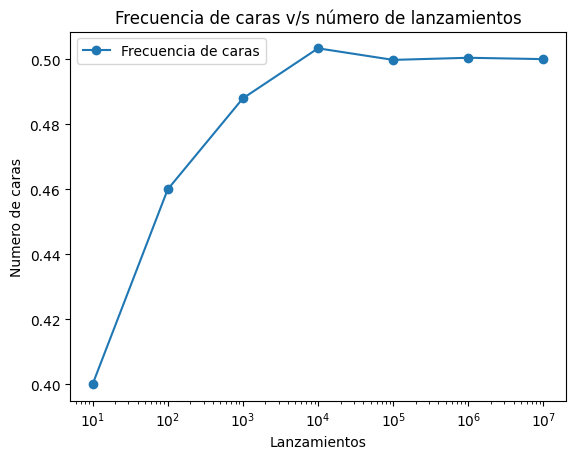

In [36]:
lanzamientos=[10,10**2,10**3,10**4,10**5,10**6,10**7]
freq_caras=[]
for i in lanzamientos:
    flip=ncoinflip(i)
    caras.append(flip.count(0)/i)
print(lanzamientos,caras)

plt.figure()
plt.xscale('log')
plt.plot(lanzamientos, freq_caras,marker='o', linestyle='-', label="Frecuencia de caras")
plt.xlabel('Lanzamientos')
plt.ylabel('Numero de caras')
plt.title('Frecuencia de caras v/s número de lanzamientos')
plt.legend()


plt.show()

$\textbf{Observación: }$ Usamos una escala logarítmica en el eje X porque notamos que las cantidades están en potencias de a $10$. De este modo podemos visualizar que la frecuencia a medida que aumentamos los lanzamientos se aproxima a $1/2$ (lo esperado), es decir, por cada $n$ lanzamientos, aproximadamente aparecen $n/2$ caras, lo que es lógico a la hora de utilizar la ley de los grandes números.

d) Generamos las diferencias en base a lo teórico y graficamos:

[0.09999999999999998, 0.03999999999999998, 0.01200000000000001, 0.0033999999999999586, 0.00015999999999999348, 0.0004929999999999657, 7.80000000000225e-05]


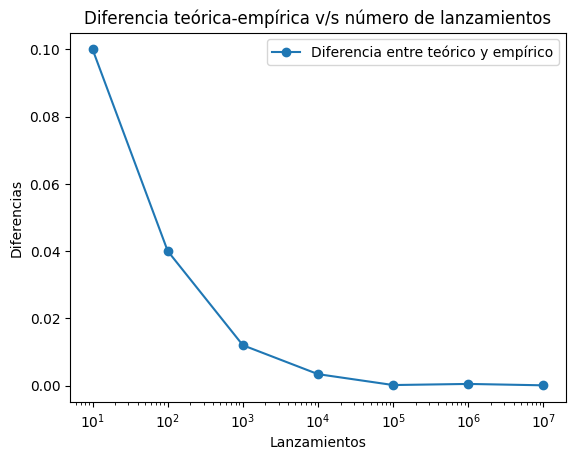

In [38]:
diferencias =[]
for i in range(0,len(caras)):
    diferencias.append(abs(1/2 - caras[i]))
print(diferencias)

plt.figure()
plt.xscale('log')
plt.plot(lanzamientos, diferencias,marker='o', linestyle='-', label="Diferencia entre teórico y empírico")
plt.xlabel('Lanzamientos')
plt.ylabel('Diferencias')
plt.title('Diferencia teórica-empírica v/s número de lanzamientos')
plt.legend()


plt.show()

Notamos que la diferencia entre la frecuencia de caras empírica y teórica se aproxima a 0 que es justamente lo esperado.

Concluímos que este cuociente se va a $0$, lo que coincide con la ley.

e) Simulamos las situaciones dadas y generamos los datos. Luego de eso creamos el histograma:

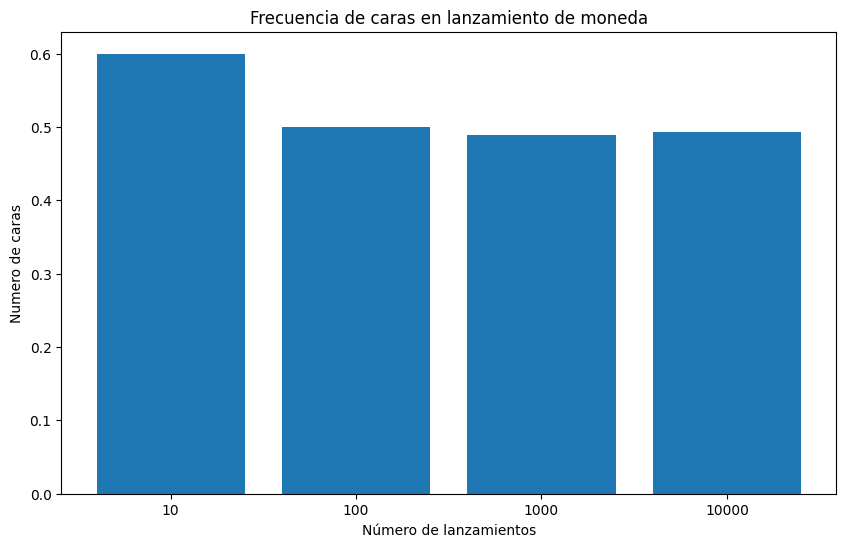

In [44]:
lanzamientos = [10, 10**2, 10**3, 10**4]
caras = []

for i in lanzamientos:
    flip = ncoinflip(i)
    caras.append(flip.count(0)/i)

plt.figure(figsize=(10, 6))
plt.bar(range(len(lanzamientos)), caras, tick_label=[str(x) for x in lanzamientos])

plt.title('Frecuencia de caras en lanzamiento de moneda')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Numero de caras (frecuencia)')
plt.show()

f) La frecuencia de caras mayor se encuentra en los casos donde se realizaron menos lanzamientos. Esto es normal ya que es mucho mas probable que este valor oscile para pocos lanzamientos y a medida que se vayan aumentando este número se debe estabilizar alrededor de 0.5. También podría haber ocurrido que hubiese menos frecuencia en estos casos, ya que pueden salir más o menos caras con mayor fiabilidad en los casos con pocos lanzamientos, y esto solo se acerca a una constante (0.5) cuando aumentamos el número de simulaciones por la ley de los grandes números.

g) Al realizar tres lanzamientos consecutivos, tenemos el siguiente espacio muestral: $\{CCC,CCS,CSC,SCC,SSC,SCS,SSS,CSS\}$. De estas posibilidades, solo una es la que nos sirve (la de obtener tres caras seguidas), por lo tanto la probabilidad es $1/8$. Para explicar este suceso, podemos graficar la situación, considerando la función de probabilidad del experimento:

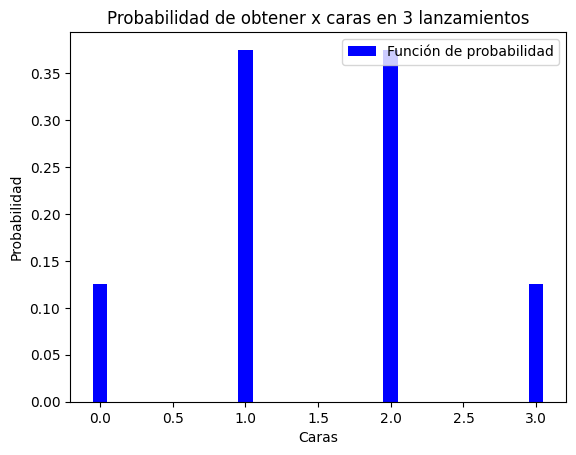

In [45]:
caras = [0, 1, 2, 3]
probabilidades_cara = [1/8, 3/8, 3/8, 1/8]
plt.figure()
plt.bar(caras, probabilidades_cara, color='blue', width=0.1, label="Función de probabilidad")
plt.xlabel('Caras')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de obtener x caras en 3 lanzamientos')
plt.legend()
plt.show()

# Problema del cumpleaños

a) Calculemos la probabilidad teórica y luego creemos la función. Siguiendo la indicación, calculemos la probabilidad del complemento. La probabilidad de que un par de personas no esté de cumpleaños el mismo dia es de $364/365$. Para generalizar para $n$ personas, supongamos que la primera persona está de cumpleaños en un día $a_1$. Luego, la segunda persona del grupo no puede estar de cumpleaños en $a_1$. Ya vimos que la probabilidad de que esto ocurra es de $364/365$. Supongamos que esta persona está de cumpleaños en $a_2 \neq a_1$. A continuación, la tercera persona no puede estar de cumpleaños ni en $a_1$ ni en $a_2$. La probabilidad de que esto ocurra es de $363/365$. Supongamos que esta persona está de cumpleaños en $a_3 \neq a_1, a_2$. Si continuamos con el proceso, notamos que la $n-$ésima persona satisfacerá no estar de cumpleaños el mismo dia que las otras con probabilidad $(365- (n-1))/365$. Como todos estos eventos son claramente independientes (no hay dependencia en estar de cumpleaños), la probabilidad de que ninguno esté de cumpleaños el mismo dia es 

$$p = \frac{364}{365} \times \frac{363}{365} \times \cdots \times \frac{365-(n-1)}{365}$$

Tomando complemento, el valor que buscamos es

$$1-p = 1-\frac{364}{365} \times \frac{363}{365} \times \cdots \times \frac{365-(n-1)}{365}$$

In [46]:
def prob_teo(n):
    if n==1:
        return 0
    elif n==2:
        return 1-364/365
    p=364/365
    for i in range(2,n):
        p=p*(365-i)/365
    return 1-p

In [51]:
print("Los valores para n=10 y n=23 son ", prob_teo(10), "y", prob_teo(23), "respectivamente")

Los valores para n=10 y n=23 son  0.1169481777110779 y 0.5072972343239855 respectivamente


Creamos el programa para graficar lo pedido:

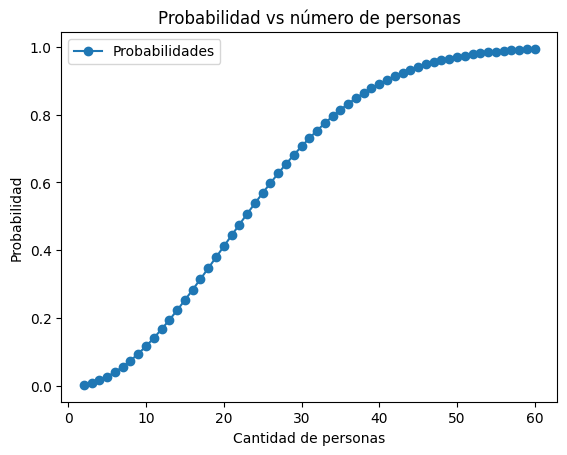

In [312]:
probas=[]
personas=[]
for i in range(2,61):
    probas.append(prob_teo(i))
    personas.append(i)

plt.figure()
plt.plot(personas, probas,marker='o', linestyle='-', label="Probabilidades")
plt.xlabel('Cantidad de personas')
plt.ylabel('Probabilidad')
plt.title('Probabilidad vs número de personas')
plt.legend()


plt.show()    

Claramente la función parte con crecimiento bajo debido a que la probabilidad para pocas personas debe ser baja, luego empieza a crecer mas rapido a medida que oscilamos entre 10 y 30 personas y luego vuelve a crecer lento ya que nos acercamos mucho al valor de probabilidad $1$ cuando tenemos muchas personas.

b) Creamos la función

In [52]:
def evento(n):
    simular = tuple(random.choices(range(1, 366), k=n))
    if len(simular) != len(set(simular)):
        return 1
    return 0

Creamos un programa que haga 10 llamadas a la función e imprimimos:

In [53]:
resultados=[]
for i in range(0,10):
    resultados.append(evento(23))
print(resultados)

[0, 0, 0, 0, 1, 1, 0, 1, 0, 0]


c) Creamos la función y entregamos los resultados pedidos:

In [57]:
def prob_exp(n):
    resultados_exp=[]
    for i in range(0,1000):
        resultados_exp.append(evento(n))
    return resultados_exp.count(1)/len(resultados_exp)
print("Los resultados para n=10 y n=23 son aproximadamente", prob_exp(10),prob_exp(23), "respectivamente")
print("Los resultados para n=10 y n=23 son teóricamente", prob_teo(10),prob_teo(23), "respectivamente")

Los resultados para n=10 y n=23 son aproximadamente 0.121 0.486 respectivamente
Los resultados para n=10 y n=23 son teóricamente 0.1169481777110779 0.5072972343239855 respectivamente


Notamos que los resultados son cercanos a los hallados en el ítem anterior.

d) Graficamos los resultados:

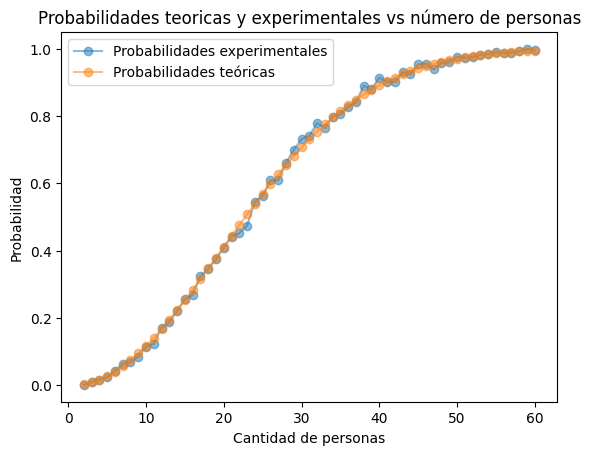

In [58]:
proba_expe_1000=[]
proba_teo=[]
personas=[]

for i in range(2,61):
    proba_teo.append(prob_teo(i))
    proba_expe_1000.append(prob_exp(i))
    personas.append(i)
    
plt.figure()
plt.plot(personas, proba_expe_1000,marker='o', linestyle='-', alpha=0.5, label="Probabilidades experimentales")
plt.plot(personas, proba_teo,marker='o', linestyle='-', alpha=0.5, label="Probabilidades teóricas")
plt.xlabel('Cantidad de personas')
plt.ylabel('Probabilidad')
plt.title('Probabilidades teoricas y experimentales vs número de personas')
plt.legend()


plt.show()    


Notamos que ambas gráficas se solapan en varios puntos, lo que indica que la probabilidad experimental es cercana a la teórica. Veamos que pasa si aumentamos el número de simulaciones a $10000$ y $100000$ modificando la función prob_exp:

In [59]:
def prob_exp_var(n,m):
    resultados_exp=[]
    for i in range(0,m):
        resultados_exp.append(evento(n))
    return resultados_exp.count(1)/len(resultados_exp)

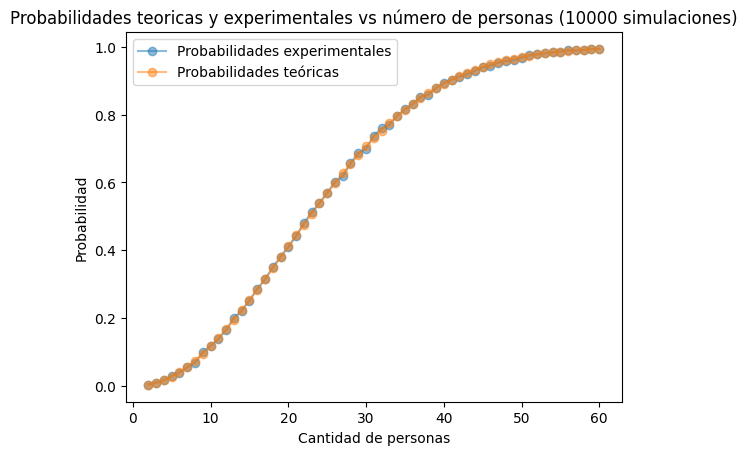

In [62]:
proba_expe_10000=[]
proba_teo=[]
personas=[]

for i in range(2,61):
    proba_teo.append(prob_teo(i))
    proba_expe_10000.append(prob_exp_var(i,10000))
    personas.append(i)
    
plt.figure()
plt.plot(personas, proba_expe_10000,marker='o', linestyle='-', alpha=0.5, label="Probabilidades experimentales")
plt.plot(personas, proba_teo,marker='o', linestyle='-', alpha=0.5, label="Probabilidades teóricas")
plt.xlabel('Cantidad de personas')
plt.ylabel('Probabilidad')
plt.title('Probabilidades teoricas y experimentales vs número de personas (10000 simulaciones)')
plt.legend()


plt.show()    


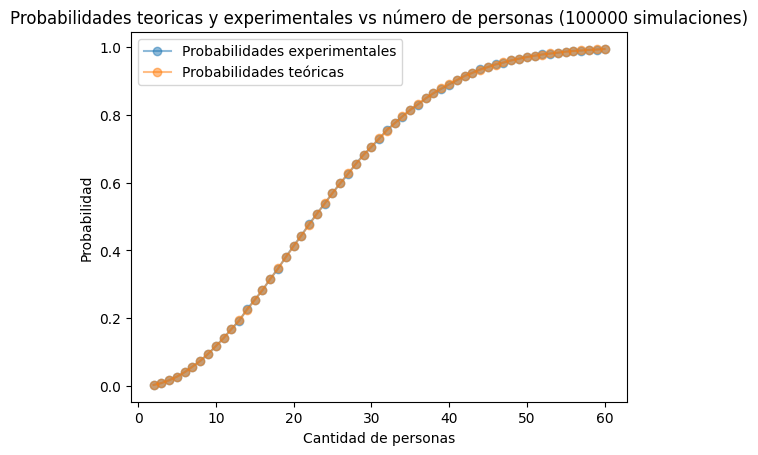

In [61]:
proba_expe_100000=[]
proba_teo=[]
personas=[]

for i in range(2,61):
    proba_teo.append(prob_teo(i))
    proba_expe_100000.append(prob_exp_var(i,100000))
    personas.append(i)
    
plt.figure()
plt.plot(personas, proba_expe_100000,marker='o', linestyle='-', alpha=0.5, label="Probabilidades experimentales")
plt.plot(personas, proba_teo,marker='o', linestyle='-', alpha=0.5, label="Probabilidades teóricas")
plt.xlabel('Cantidad de personas')
plt.ylabel('Probabilidad')
plt.title('Probabilidades teoricas y experimentales vs número de personas (100000 simulaciones)')
plt.legend()


plt.show()    


Notamos que a medida que aumentamos las simulaciones, los gráficos cada vez se parecen más, notando que en el de 100000 simulaciones los gráficos son practicamente el mismo.

e) Para responder esto, modificaremos la función evento para que detecte al menos $3$ personas con el mismo cumpleaños y luego un programa que itere 5000 veces por cada $n$:

In [63]:
def evento_3(n):
    simular = tuple(random.choices(range(1, 366), k=n))
    counts = Counter(simular)
    for count in counts.values():
        if count>=3:
            return 1
    return 0

In [64]:
resultados=[]
for i in range(0,10):
    resultados.append(evento_3(100))
print(resultados)

[1, 1, 1, 0, 0, 1, 0, 0, 1, 1]


In [65]:
def prob_exp_3(n):
    resultados_exp=[]
    for i in range(0,5000):
        resultados_exp.append(evento_3(n))
    return resultados_exp.count(1)/len(resultados_exp)

In [68]:
prob_exp_3(30)

0.0288

A continuación, generamos datos desde $n=3$ hasta $n=90$ para ver cuando se obtiene mayor a $50%$ (si es que estos números son suficientes o necesitamos más):

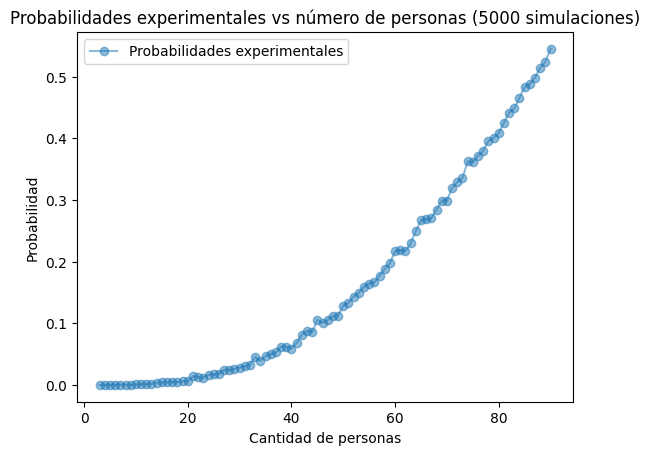

In [69]:
proba_expe_3=[]
personas=[]

for i in range(3,91):
    proba_expe_3.append(prob_exp_3(i))
    personas.append(i)
    
plt.figure()
plt.plot(personas, proba_expe_3,marker='o', linestyle='-', alpha=0.5, label="Probabilidades experimentales")
plt.xlabel('Cantidad de personas')
plt.ylabel('Probabilidad')
plt.title('Probabilidades experimentales vs número de personas (5000 simulaciones)')
plt.legend()


plt.show()    

Notamos que pasado los $80$ parece lograrse la probabilidad buscada. Retornamos los valores desde $80$ en adelante:

In [70]:
proba_expe_3[80:]

[0.4484, 0.4654, 0.4832, 0.488, 0.4984, 0.514, 0.5242, 0.5448]

Concluímos que aproximadamente para $n=88$ se tendrá una probabilidad mayor a $50\%$

f) Ventajas de calcular probabilidades teóricamente:
1) El resultado es exacto, es decir, no es una aproximación al valor real.
2) No se necesita programar ni simular nada, no es necesario un computador ni algún software especializado.
3) Si el problema lo amerita, esto puede ser muchísimo más rapido que realizar una simulación programada.

Desventajas de calcular probabilidades teóricamente:
1) Dependiendo del problema, puede ser muy díficil o derechamente imposible calcular la probabilidad teórica a mano, a menos que recurramos a funciones especiales o a realizar un calculo fuerza bruta
2) Se pueden cometer errores al momento de calcular probabilidades a mano, como asumir cierta independencia, errores técnicos o errores humanos a la hora de calcular

Ventajas de calcular probabilidades experimentalmente:
1) No requiere técnicas matemáticas teóricas especializadas para su realización. La mayoría (por no decir todas) de simulaciones de experimentos se basan en casos favorables / casos factibles como regla probabilística.
2) Siguiendo la misma línea del punto anterior, es díficil cometer errores teóricos en casos experimentales, ya que al ser tan sencilla la regla a utilizar, el enfoque es en el programa más que en la teoría.
3) Para problemas teóricos complejos (como la variación del problema de cumpleaños), esta técnica es preferida, ya que tener un estimado es mejor a no tener nada (pues de manera teórica no es factible obtener un resultado exacto de manera sencilla)

Desventajas de calcular probabilidades experimentalmente:
1) Está sujeto a limitaciones de la computadora que se tenga (sobre todo al trabajar con simulaciones del orden $10^7$ o más.
2) La ejecución de los experimentos puede demorar mucho tiempo.
3) No se obtiene un valor exacto, y salvo que podamos comparar con un valor teórico, jamás podremos decidir que tan cercano a la realidad es la probabilidad hallada.